### **Supervised**: `Metrics Evaluation`

#### **1. Classification**

Classification is about predicting the class labels given input data. There are many ways for measuring classification performance. Accuracy, confusion matrix, log-loss, and AUC-ROC are some of the most popular metrics. Precision-recall is a widely used metrics for classification problems.

In [47]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X,y = make_classification(n_samples = 1000, n_classes=2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=0, stratify = y)

In [48]:
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:,1]

In [49]:
len(y_proba)

300

**1.1 Confusion Matrix:** is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values. It is extremely useful for measuring the Recall, Precision, Accuracy, and AUC-ROC curves.

- **True Positive**: We predicted positive and it's true.
- **True Negative**: We predicted negative and it's true.
- **False Positive (Type 1 Error)**: We predicted positive and it's false.
- **False Negative (Type 2 Error)**: We predicted negative and it's false.


In [50]:
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

print(f'True Positive = {tp}')
print(f'True Negative = {tn}')
print(f'False Positive = {fp}')
print(f'False Negative = {fp}')

True Positive = 133
True Negative = 117
False Positive = 34
False Negative = 34


In [51]:
import seaborn as sns
from matplotlib import pyplot as plt

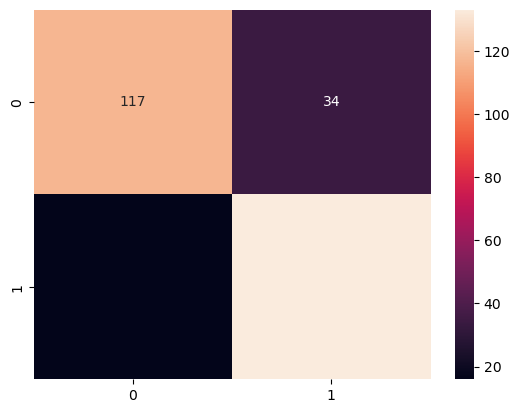

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')
plt.show()

**1.2 Classification Report:** is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. It provides a better understanding of the overall performance of our trained model.

- **Accuracy**: It measures how many observations, both positive and negative, were correctly classified.
- **Recall**: It measures how many observations out of all positive observations have we classified as positive. It is a useful metrics in cases where False Negative is of higher concern than False Positive.
- **Precision**: It measures how many observations predicted as positive are in fact positive. Precision is useful in the cases where False Positive is of higher concern than False Negative.
- **F1-score**: It's the harmonic mean between precision and recall. It is useful where False Positive and False Negative are equally costly.
- **Macro-averaged**: All classes equally contribute to the final averaged metric.
- **Weighted-averaged**: Each classes's contribution to the average is weighted by its size


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       151
           1       0.80      0.89      0.84       149

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



In [54]:
from sklearn.metrics import precision_score,recall_score,f1_score

print(f'recal {recall_score(y_test,y_pred):.2f}')
print(f'precision {precision_score(y_test,y_pred):.2f}')
print(f'f1 {f1_score(y_test,y_pred):.2f}')

recal 0.89
precision 0.80
f1 0.84


**1.3 ROC Curve & AUC Score:** is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Of course, the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left side are better.

Although the ROC Curve is a helpfull diagnostic tool, it can be challenging to compare two or more classifiers based on their curves. Instead, the area undeer the curve can be calculated to give a single score for a classifier model accross all threshold values. This is called the ROC area under curve or ROC AUC or sometimes ROC-AUC.


Best Threshold : 0.7498594375339794


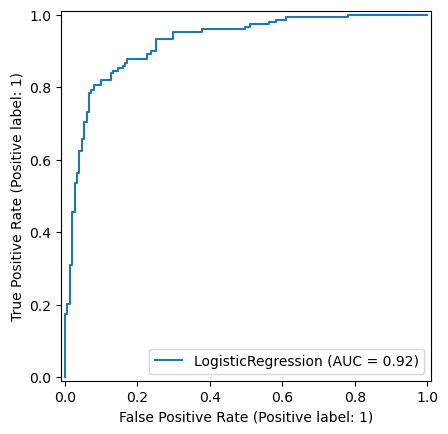

In [55]:
import numpy as np
from sklearn.metrics import roc_curve,RocCurveDisplay

fpr, tpr, threshold = roc_curve(y_test,y_proba)
# fpr, tpr, threshold

gmeans = np.sqrt(tpr*(1-fpr)) #geometric means (tpr * tnr) ** 0.5
ix = np.argmax(gmeans)

print(f'Best Threshold : {threshold[ix]}')

RocCurveDisplay.from_estimator(model,X_test,y_test)
plt.show()


**When to use it:**

- You should use it when you ultimately care about ranking predictions and not necessarily about outputting well-calibrated probabilities
- You should not use it when your data is heavily imbalanced. The intuition is the following: false positive rate for highly imbalanced datasets is pulled down due to a large number of true negatives.
- You should use it when you care equally about positive and negative classes.

**1.4 PR Curve:** is a curve that combines Precision and Recall in a single visualization. For every threshold, you calculate them and plot it. The higher on y-axis your curve is the better your model performance. You can use this plot to make an educated decision when it comes to the classic, precision/recall dilemma. Obviously, the higher the recall teh lower the precision. Knowing at which recall your precision starts to fall fast can help you choose the threshold and deliver a better model.

Similarly to ROC AUC score, you can calculate the Area Under the Precision-Recall Curve to get one number that describes model performance.


Best Threshold : 0.5882164989006026


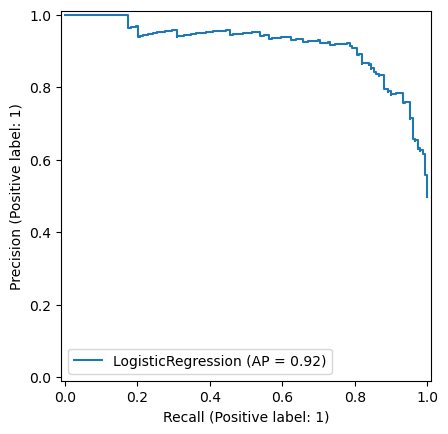

In [56]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay

precision, recall, threshold = precision_recall_curve(y_test,y_proba)

fscore = 2 * precision * recall / (precision + recall)
ix = np.argmax(fscore)

print(f'Best Threshold : {threshold[ix]}')

PrecisionRecallDisplay.from_estimator(model,X_test,y_test)
plt.show()



**When to use it:**

- when you want to communicate precision/recall decision to other stakeholders
- when you want to choose the threshold that fits the business problem
- when your data is heavily imbalanced. The intuition is the following: since PR AUC focuses mainly on the positive class (PPV and TPR) it cares less about the frequent negative class.
- when you care more about positive than negative class.

#### **2. Regression**

Since our model will produce an output given any input or set of inputs, we can then check these estimated outputs against the actual values that we tried to predict. We call the difference between the actual value and the model's estimate a residual. We can calculate the residual for every point in our data set and each of these residuals will be of use in assessment. The residuals will play a significant role in judging the usefulness of a model.

In [57]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X,y = make_regression(n_samples=500, n_features=1, noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((350, 1), (150, 1), (350,), (150,))

In [58]:
#define model

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [59]:
y_test

array([  33.54432637,   32.80995376,    0.41255762,   62.97034048,
        -69.93158742,   25.51489431,   52.03739577, -115.23381306,
         32.13763454,  112.67573578,  -67.5445511 , -106.25804661,
        -48.55184488,   -4.49518608,  -51.57109864,  -11.54722154,
        -26.3537009 ,   85.08317851,  -58.2875817 ,   18.16678635,
        105.23511315,   -1.80237243,   49.37950058,   83.71056027,
        102.6073314 ,   15.17960547,  121.87296342,  -58.31270952,
         44.09129469,   -4.01604385,  -35.53556889,  -13.20662702,
         -2.69030783,   52.52879047,  101.74708926,  -52.36464624,
        -37.96236447,  -26.09909339,   35.16553523,   55.00050874,
        -31.35761968,   25.50964999,   91.29211113,  -46.12057749,
         12.03839408,   -7.13185853,   25.76932508,  -32.97009396,
        -67.21284769,   -8.52942586,   20.65859208,   78.43292928,
         55.51667945,   16.28357235,   28.55682223,   19.2626881 ,
        -40.66863636,  130.03026797,    1.84943021,   31.28295

**2.1 Mean Absolute Error:** is the most intuitive of the metrics since we're just looking at the absolute difference between the data and the model's prediction. Because we use the absolute value of the residual, the MAE does not indicate underperformance or overperformance of the model. Each residual contributes proportionally to the total amount of error, meaning that larger errors will contribute linearly to the overall error.

$$MAE = \frac{1}{n} \sum\limits_{i=1}^n |y_i - \hat{y}_i|$$


In [60]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

17.036105382831174

**2.2 Mean Square Error:** is just like the MAE, but squares the difference before summing them all instead of using the absolute value. The effect of the square term in the MSE equation is most apparent with the presence of outliers in our data. While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE. This ultimately means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE. Similarly, our model will be penalized more for making predictions that differ greatly from the corresponding actual value.

$$MSE = \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2$$


In [61]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

455.3358686476293

**2.3 Root Mean Square Error:** is the square root of the MSE. Because the MSE is squared, its units do not match that of the original output. Researchers will often use RMSE to convert the error metric back into similar units, making interpretation easier. Since the MSE and RMSE both square the residual, they are similarly affected by outliers. The RMSE is analogous to the standard deviation and is a measure of how large your residuals are spread out.

$$RMSE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2}$$


In [62]:
# np.sqrt(mean_squared_error(y_test,y_pred))
# mean_squared_error(y_test,y_pred,squared=False)
mean_squared_error(y_test,y_pred)**0.5

21.338600437883205

**2.4 Mean Absolute Percentage Error:** is the percentage equivalent of MAE. The equation looks just like that of MAE, but with adjustments to convert everything into percentages. Just as MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average. Like MAE, MAPE also has a clear interpretation since percentages are easier for people to conceptualize. Both MAPE and MAE are robust to the effects of outliers thanks to the use of absolute value.

$$MAPE = \frac{1}{n} \sum\limits_{i=1}^n |\frac{y_i - \hat{y}_i}{y_i}|$$


In [63]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,y_pred)

1.5476964580509671

**2.5 Root Mean Squared Percentage Error:** is the percentage equivalent of RMSE. The equation looks just like that of RMSE, but with adjustments to convert everything into percentages. 

$$RMSPE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^n (\frac{y_i - \hat{y}_i}{y_i})^2}$$


In [64]:
from statsmodels.tools.eval_measures import rmspe


# def rmspe(y_test, y_pred):
#     ape = np.abs((y_test - y_pred) / y_test)
#     mape = np.mean(ape)
#     rmspe = np.sqrt(mape)
#     return rmspe

# rmspe(y_test, y_pred)

# def rmspe(y_true, y_pred) :
#     squared_percentage_error = np.square((y_true - y_pred) / y_true)
#     mean_spe = np.mean(squared_percentage_error)
#     rmspe = np.sqrt(mean_spe)
#     return rmspe

rmspe(y_test, y_pred)

61.3804502164352

**2.6 Root Mean Squared Log Error:** is calculated by applying log to the actual and the predicted values and then taking their differences. RMSLE is robust to outliers where the small and large errors are treated evenly. It penalizes the model more if the predicted value is less than the actual value while the model is less penalized if the predicted value is more than the actual value. Hence the model has a large penalty for underestimation than overestimation. This can be helpful in situations where we are not bothered by overestimation but underestimation is not acceptable.

$$RMSLE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^n (log(y_i + c) - log(\hat{y}_i + c))^2}$$


In [65]:
# from sklearn.metrics import root_mean_squared_log_error

# root_mean_squared_log_error(y_test, y_pred)

def rmsle(y_test, y_pred):
    assert len(y_test) == len(y_pred)
    terms_to_sum = [(np.log(y_pred[i] + 1) - np.log(y_test[i] + 1)) ** 2.0 for i in range(len(y_test))]
    return np.sqrt(np.mean(terms_to_sum))

rmsle(y_test, y_pred) 

# Hasil 'nan' karena ada nilai negatif atau 0 maka tidak bisa pakai logaritma

C:\Users\Fiki\AppData\Local\Temp\ipykernel_22276\439422098.py:7: RuntimeWarning: invalid value encountered in log
  terms_to_sum = [(np.log(y_pred[i] + 1) - np.log(y_test[i] + 1)) ** 2.0 for i in range(len(y_test))]


nan

In [66]:
import sklearn

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

**When to use it:**

All of the above measures deal directly with the residuals produced by our model. For each of them, we use the magnitude of the metric to decide if the model is performing well. Small error metric values point to good predictive ability, while large values suggest otherwise. That being said, it’s important to consider the nature of your data set in choosing which metric to present. Outliers may change your choice in metric, depending on if you’d like to give them more significance to the total error. Some fields may just be more prone to outliers, while others are may not see them so much. Remember that intuition we developed behind our metrics and apply them as needed.

#### **Scikit-learn Implementation**

**Importing Libraries**

In [67]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm

### `Business Problem Understanding`

**Problem Statement**
Karena jumlah tips bervariasi, maka menentukan harga yang sesuai sangatlah penting bagi kesejahteraan karyawan.

**Goals**
Menentukan jumlah tip yang tepat untuk tiap customer yang berkunjung.

**Analytic Approach**
Jadi yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu customer dengan customer yang lain.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan tool prediksi tip dari customer baru, yang mana akan berguna untuk meningkatkan kesejahteraan karyawan.

**Metric Evaluation**
Evaluasi metrik yang akan digunakan adalah MAE dan MSE. Semakin kecil nilai keduanya, berarti model semakin akurat dalam memprediksi harga tip sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menurunkan nilai R-squared atau adj. R-squared untuk mengetahui seberapa baik model dapat mempresentasilam varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.



### `Data Understanding`

In [68]:
# Load dataset 
data = sns.load_dataset('tips')
print(f'Jumlah baris dan kolom: {data.shape}')

data.head()

Jumlah baris dan kolom: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,total_bill,float64,0.0,False,229,"[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.7..."
1,tip,float64,0.0,False,123,"[1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,..."
2,sex,category,0.0,False,2,"['Female', 'Male'] Categories (2, object): ['M..."
3,smoker,category,0.0,False,2,"['No', 'Yes'] Categories (2, object): ['Yes', ..."
4,day,category,0.0,False,4,"['Sun', 'Sat', 'Thur', 'Fri'] Categories (4, o..."
5,time,category,0.0,False,2,"['Dinner', 'Lunch'] Categories (2, object): ['..."
6,size,int64,0.0,False,6,"[2, 3, 4, 1, 6, 5]"


**Insight**

- Dataset terdiri dari 244 baris dan 7 kolom.
- Variabel numerik: total_bill, tip, dan size 
- Variabel kategorikal: sex, smoker, day, dan time
- Tidak ada missing values di dalam data

### `Data Preparation`

`Duplicates`

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data

In [70]:
print(f"Jumlah duplikasi data: {data.duplicated().sum()}")
print(f"Jumlah duplikasi data: {data.duplicated().sum()/len(data)*100:.2f}%")

Jumlah duplikasi data: 1
Jumlah duplikasi data: 0.41%


Sebesar 0.41% data terindikasi duplikat, maka hilangkan salah satunya.

Handling duplikasi data:

In [71]:
data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

`Missing Values`

Deteksi dan kuantifikasi missing value

<Axes: >

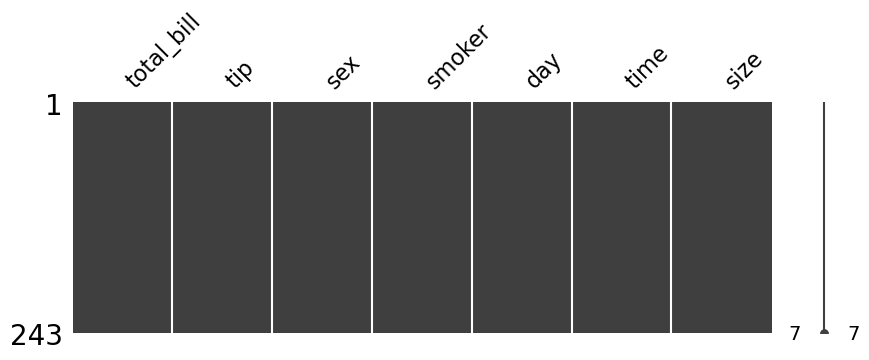

In [72]:
import missingno as msn  

msn.matrix(data, figsize=(10,3))

In [73]:
pd.DataFrame({'null': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,null
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


Tidak terdapat missing value.

`Outliers`

Deteksi dan kuantifikasi outlier:

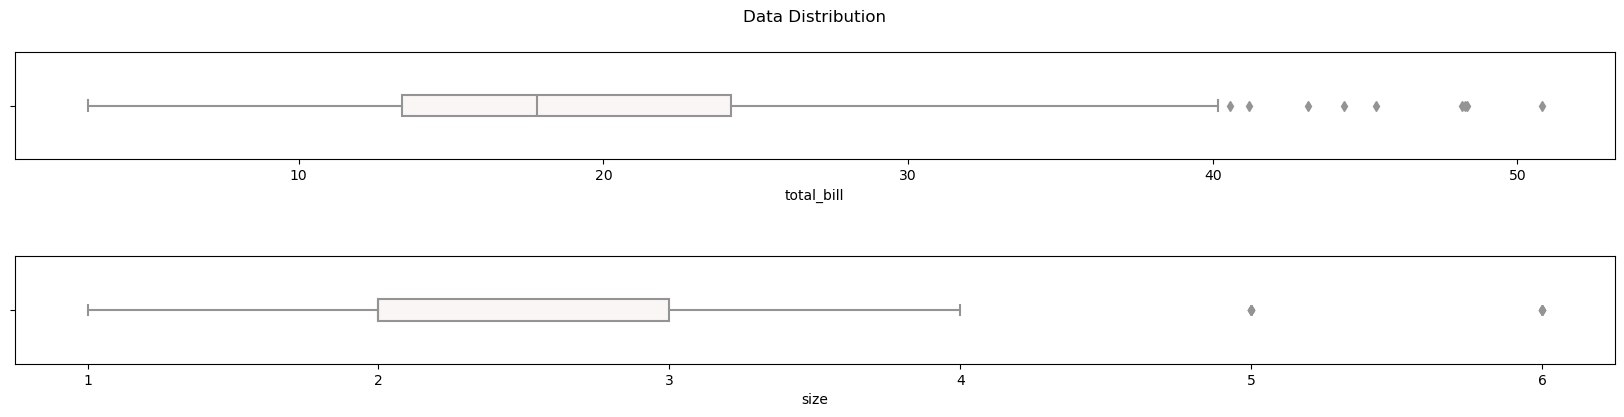

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(20, 4))

sns.boxplot(x='total_bill', data=data, width=.2, palette="vlag", ax=ax[0])
sns.boxplot(x='size', data=data, width=.2, palette="vlag", ax=ax[1])

ax[0].set_title("Data Distribution", y=1.2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()


In [75]:
numerical = ['total_bill', 'size']

In [76]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,total_bill,9,3.7,-2.8125,40.3675
1,size,9,3.7,0.5000,4.5000


Terdapat outlier sekitar 3.7% pada kolom total_bill dan size. Untuk studi kasus ini kita akan biarkan terlebih dahulu.

`Check Multicollinearity`

Deteksi multicollinearity antar fitur dengan VIF.

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

numerical_data = data[['total_bill', 'size']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]
vif["Feature"] =  numerical_data.columns

vif.round(2)

,VIF Factor,Feature
0,8.67,total_bill
1,8.67,size


Terdapat indikasi multicollinearity antara fitur total_bill dan size karena VIF-nya antara 4 - 10. Saat menggunakan model linear, multicollinearity seharusnya dihindari. Namun untuk studi kasus ini kita akan pertahankan dahulu.

**Feature Engineering**

Bagi dataset menjadi train dan test set.

In [78]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,29.03,5.92,Male,No,Sat,Dinner,3
239,27.18,2.00,Female,Yes,Sat,Dinner,2
240,22.67,2.00,Male,Yes,Sat,Dinner,2
241,17.82,1.75,Male,No,Sat,Dinner,2


In [79]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='tip')
y = data['tip']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 6), (49, 6), (194,), (49,))

In [80]:
X_train #bentuk yang kategorikal akan diubah jadi numerical

,total_bill,sex,smoker,day,time,size
209,30.06,Male,Yes,Sat,Dinner,3
64,17.59,Male,No,Sat,Dinner,3
155,29.85,Female,No,Sun,Dinner,5
104,20.92,Female,No,Sat,Dinner,2
96,27.28,Male,Yes,Fri,Dinner,2
...,...,...,...,...,...,...
67,3.07,Female,Yes,Sat,Dinner,1
192,28.44,Male,Yes,Thur,Lunch,2
117,10.65,Female,No,Thur,Lunch,2
47,32.40,Male,No,Sun,Dinner,4


### `Model Experiment`

Setting parameter dasar untuk menginisialisasi experiment dan membuat pipeline transformasi

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

scaler = RobustScaler()

transformer = ColumnTransformer([ #bentuk yang kategorikal dari X_train diubah jadi numerical
    ('onehot',OneHotEncoder(drop='first'), ['sex','smoker','day','time'])
],remainder='passthrough')

**Benchmark Model**

In [95]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

lasso = Lasso()
linreg = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

models = [lasso, linreg, knr, dtr]
# models = [Lasso(), LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor()]


mape_mean   = []
mape_std    = []
all_mape    = []
model_name  = []

for model in models:
    model_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaling', scaler),
        ('modeling', model)  # Pass the current model, not the models list
    ])

    model_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv=5,
        scoring='neg_mean_absolute_percentage_error'
    )

    mape_mean.append(model_cv.mean())
    mape_std.append(model_cv.std())
    all_mape.append(model_cv.round(3))
    model_name.append(model.__class__.__name__)  # Use model's class name for reference

In [99]:
pd.DataFrame({
    'mape_mean' : mape_mean,
    'mape_std' : mape_std,
    'all_mape' : all_mape,
    'model_name' : model_name,
})

,mape_mean,mape_std,all_mape,model_name
0,-0.413548,0.064625,"[-0.436, -0.306, -0.467, -0.378, -0.481]",Lasso
1,-0.280511,0.040152,"[-0.266, -0.255, -0.361, -0.262, -0.259]",LinearRegression
2,-0.301080,0.054454,"[-0.316, -0.288, -0.393, -0.225, -0.283]",KNeighborsRegressor
3,-0.334827,0.071402,"[-0.325, -0.246, -0.458, -0.353, -0.292]",DecisionTreeRegressor


**Predict Benchmark Model to Test Set**

Untuk mengukur performa akhir model

In [100]:
models = [lasso, linreg, knr, dtr]

mape_score = []
model_name = []
for model in models:
    model_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaling', scaler),
        ('modeling', model)
    ])

    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)

    mape = mean_absolute_percentage_error(y_test, y_pred)

    mape_score.append(mape)
    model_name.append(model.__class__.__name__)

In [101]:
pd.DataFrame({
    'model_name' : model_name,
    'mape_score' : mape_score
}).sort_values('mape_score',ascending=True)

,model_name,mape_score
2,KNeighborsRegressor,0.343793
1,LinearRegression,0.354319
3,DecisionTreeRegressor,0.362366
0,Lasso,0.436557


**Insight**

- Benchmark model terbaik, berdasarkan analisis di atas adalah 'Linear Regression' :
    - Pada train set, rata-rata MAPE cukup kecil dan modelnya stabil
    - Namun, pada test set, hasil prediksinya justru sebesar 0.354 (menjauhi nilai rata-ratanya).
- Sedangkan model KNN, hasil prediksi pada test setnya menghasilkan MAPE sebesar 0.343. 
- Dimana nilai ini jauh lebih baik, dibandingkan hasil prediksi pada test set untuk model Linear Regression.
- Selain itu, nilainya juga mendekati nilai rata-rata pada train set.
- Maka kita putuskan untuk menggunakan KNN, sebagai model terbaiknya, karena lebih stabil baik pada data train maupun test
- Tahap selanjutnya, kita akan melakukan hyperparameter tuning.

**Hyperparameter Tuning**

In [108]:
param_grid = {
    'modeling__n_neighbors' : range(3,30,2)
}

In [109]:
from sklearn.model_selection import GridSearchCV

knr = KNeighborsRegressor()

knr_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('scaling', scaler),
    ('modeling', knr),
])

tuned_model = GridSearchCV(
    estimator=knr_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=1
)

tuned_model.fit(X_train, y_train)

c:\Users\Fiki\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'day',
                                                                          'time'])])),
                                       ('scaling', RobustScaler()),
                                       ('modeling', KNeighborsRegressor())]),
             n_jobs=1, param_grid={'modeling__n_neighbors': range(3, 30, 2)},
             scoring='neg_mean_absolute_percentage_error')

In [110]:
print(f'best tuning mape score : {tuned_model.best_score_}')
print(f'best tuning parameter : {tuned_model.best_params_}')

best tuning mape score : -0.29333781176735546
best tuning parameter : {'modeling__n_neighbors': 15}


In [111]:
pd.DataFrame(tuned_model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.005026,0.000638,0.002681,0.000454,15,{'modeling__n_neighbors': 15},-0.312064,-0.250371,-0.350980,-0.258393,-0.294881,-0.293338,0.036723,1
7,0.004704,0.000433,0.002808,0.000603,17,{'modeling__n_neighbors': 17},-0.317116,-0.253969,-0.352037,-0.267381,-0.299707,-0.298042,0.035113,2
5,0.004958,0.000461,0.002914,0.000597,13,{'modeling__n_neighbors': 13},-0.314621,-0.262417,-0.342884,-0.265753,-0.306153,-0.298366,0.030537,3
1,0.005207,0.000522,0.002918,0.000386,5,{'modeling__n_neighbors': 5},-0.316454,-0.287592,-0.392521,-0.225336,-0.283496,-0.301080,0.054454,4
2,0.005575,0.000602,0.002768,0.000543,7,{'modeling__n_neighbors': 7},-0.314181,-0.290246,-0.365181,-0.232044,-0.310060,-0.302342,0.042980,5
8,0.005742,0.000232,0.003445,0.000754,19,{'modeling__n_neighbors': 19},-0.326224,-0.251366,-0.349203,-0.276218,-0.309338,-0.302470,0.034917,6
4,0.005438,0.000538,0.003083,0.000975,11,{'modeling__n_neighbors': 11},-0.329730,-0.271381,-0.352994,-0.271927,-0.304762,-0.306159,0.032039,7
3,0.005254,0.000241,0.002913,0.000594,9,{'modeling__n_neighbors': 9},-0.332044,-0.282464,-0.359556,-0.263390,-0.307494,-0.308990,0.034274,8
9,0.005614,0.000585,0.003387,0.000317,21,{'modeling__n_neighbors': 21},-0.331737,-0.248395,-0.354278,-0.284474,-0.327069,-0.309191,0.037863,9
0,0.005987,0.001971,0.003029,0.000648,3,{'modeling__n_neighbors': 3},-0.329338,-0.254070,-0.408175,-0.271050,-0.306477,-0.313822,0.054031,10


In [112]:
tuned_model.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('scaling', RobustScaler()),
                ('modeling', KNeighborsRegressor(n_neighbors=15))])

*Predict Tuned Model to Test Set*

In [113]:
best_model = tuned_model.best_estimator_

best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

mean_absolute_percentage_error(y_test,y_pred)

0.3652352078531036

| MAPE Score | Train Set | Test Set |
| --- | --- | --- |
| Before Tuning | 0.301 | 0.343 |
| After Tuning | 0.293 | 0.365 |

**Insight**

Performa model tidak meningkat setelah dilakukan tuning

- MAPE sebelum tuning pada test set : 33.9%
- MAPE setelah tuning pada test test : 36.5 %

Maka kita akan menggunakan model KNN sebelum dituning sebagai final model.